In [1]:
import pandas as pd
import numpy as np
import random
import math
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)   
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth',-1)

In [2]:
# removing trans_id as it is of no use
train_df = pd.read_csv('../data/train.csv', header=0)
del train_df['trans_id']
train_df.head()

,fraud_or_not,trans_dt,trans_amt,prod_code,card_no1,card_no2,card_no3,card_no4,card_no5,card_no6,address1,address2,district1,district2,P_emaildomain,R_emaildomain,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,FA14,FB1,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FC1,FC2,FC3,FC4,FC5,FC6,FC7,FC8,FC9,FD1,FD2,FD3,FD4,FD5,FD6,FD7,FD8,FD9,FD10,FD11,FD12,FD13,FD14,FD15,FD16,FD17,FD18,FD19,FD20,FD21,FD22,FD23,FD24,FD25,FD26,FD27,FD28,FD29,FD30,FD31,FD32,FD33,FD34,FD35,FD36,FD37,FD38,FD39,FD40,FD41,FD42,FD43,FD44,FD45,FD46,FD47,FD48,FD49,FD50,FD51,FD52,FD53,FD54,FD55,FD56,FD57,FD58,FD59,FD60,FD61,FD62,FD63,FD64,FD65,FD66,FD67,FD68,FD69,FD70,FD71,FD72,FD73,FD74,FD75,FD76,FD77,FD78,FD79,FD80,FD81,FD82,FD83,FD84,FD85,FD86,FD87,FD88,FD89,FD90,FD91,FD92,FD93,FD94,FD95,FD96,FD97,FD98,FD99,FD100,FD101,FD102,FD103,FD104,FD105,FD106,FD107,FD108,FD109,FD110,FD111,FD112,FD113,FD114,FD115,FD116,FD117,FD118,FD119,FD120,FD121,FD122,FD123,FD124,FD125,FD126,FD127,FD128,FD129,FD130,FD131,FD132,FD133,FD134,FD135,FD136,FD137,FD138,FD139,FD140,FD141,FD142,FD143,FD144,FD145,FD146,FD147,FD148,FD149,FD150,FD151,FD152,FD153,FD154,FD155,FD156,FD157,FD158,FD159,FD160,FD161,FD162,FD163,FD164,FD165,FD166,FD167,FD168,FD169,FD170,FD171,FD172,FD173,FD174,FD175,FD176,FD177,FD178,FD179,FD180,FD181,FD182,FD183,FD184,FD185,FD186,FD187,FD188,FD189,FD190,FD191,FD192,FD193,FD194,FD195,FD196,FD197,FD198,FD199,FD200,FD201,FD202,FD203,FD204,FD205,FD206,FD207,FD208,FD209,FD210,FD211,FD212,FD213,FD214,FD215,FD216,FD217,FD218,FD219,FD220,FD221,FD222,FD223,FD224,FD225,FD226,FD227,FD228,FD229,FD230,FD231,FD232,FD233,FD234,FD235,FD236,FD237,FD238,FD239,FD240,FD241,FD242,FD243,FD244,FD245,FD246,FD247,FD248,FD249,FD250,FD251,FD252,FD253,FD254,FD255,FD256,FD257,FD258,FD259,FD260,FD261,FD262,FD263,FD264,FD265,FD266,FD267,FD268,FD269,FD270,FD271,FD272,FD273,FD274,FD275,FD276,FD277,FD278,FD279,FD280,FD281,FD282,FD283,FD284,FD285,FD286,FD287,FD288,FD289,FD290,FD291,FD292,FD293,FD294,FD295,FD296,FD297,FD298,FD299,FD300,FD301,FD302,FD303,FD304,FD305,FD306,FD307,FD308,FD309,FD310,FD311,FD312,FD313,FD314,FD315,FD316,FD317,FD318,FD319,FD320,FD321,FD322,FD323,FD324,FD325,FD326,FD327,FD328,FD329,FD330,FD331,FD332,FD333,FD334,FD335,FD336,FD337,FD338,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_11,fs_12,fs_13,fs_14,fs_15,fs_16,fs_17,fs_18,fs_19,fs_20,fs_21,fs_22,fs_23,fs_24,fs_25,fs_26,fs_27,fs_28,fs_29,fs_30,fs_31,fs_32,fs_33,fs_34,fs_35,fs_36,fs_37,fs_38,device_type,device_info
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,True,True,True,M2,False,True,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,

In [3]:
len(train_df.columns)

433

In [4]:
# code to reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

train_df = reduce_mem_usage(train_df)

# Mem. usage decreased to 823.60 Mb (47.4% reduction)

Mem. usage decreased to 821.80 Mb (47.3% reduction)


In [5]:
# checking nan values in the dataset
dataset_length = len(train_df)
train_df_na_per = pd.DataFrame(train_df.isnull().sum()*100/dataset_length , columns=['na_percentage'])
train_df_na_per = train_df_na_per.rename_axis('column_name').sort_values(by='na_percentage', ascending=False).reset_index()
train_df_na_per.head(10)

,column_name,na_percentage
0,fs_24,99.194170
1,fs_25,99.128975
2,fs_08,99.125377
3,fs_07,99.125377
4,fs_21,99.124107
5,fs_26,99.123683
6,fs_27,99.122625
7,fs_23,99.122625
8,fs_22,99.122625
9,district2,93.601619


In [6]:
# making lists containing categorical and numeric data respectively

type_dict = dict(train_df.dtypes)
cat_columns = []
numeric_columns = []
for key,value in type_dict.items():
#     print(key,value.str)
    if 'i' in value.str or 'f' in value.str:
        numeric_columns.append(key)
    else:
        cat_columns.append(key)

In [7]:
# imputing 'missing' and -1 in nan fields for respective dtypes
train_df[cat_columns] = train_df[cat_columns].replace({np.nan:'missing'})
train_df[numeric_columns] = train_df[numeric_columns].replace({np.nan:-1})
train_df.head()

,fraud_or_not,trans_dt,trans_amt,prod_code,card_no1,card_no2,card_no3,card_no4,card_no5,card_no6,address1,address2,district1,district2,P_emaildomain,R_emaildomain,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,FA14,FB1,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FC1,FC2,FC3,FC4,FC5,FC6,FC7,FC8,FC9,FD1,FD2,FD3,FD4,FD5,FD6,FD7,FD8,FD9,FD10,FD11,FD12,FD13,FD14,FD15,FD16,FD17,FD18,FD19,FD20,FD21,FD22,FD23,FD24,FD25,FD26,FD27,FD28,FD29,FD30,FD31,FD32,FD33,FD34,FD35,FD36,FD37,FD38,FD39,FD40,FD41,FD42,FD43,FD44,FD45,FD46,FD47,FD48,FD49,FD50,FD51,FD52,FD53,FD54,FD55,FD56,FD57,FD58,FD59,FD60,FD61,FD62,FD63,FD64,FD65,FD66,FD67,FD68,FD69,FD70,FD71,FD72,FD73,FD74,FD75,FD76,FD77,FD78,FD79,FD80,FD81,FD82,FD83,FD84,FD85,FD86,FD87,FD88,FD89,FD90,FD91,FD92,FD93,FD94,FD95,FD96,FD97,FD98,FD99,FD100,FD101,FD102,FD103,FD104,FD105,FD106,FD107,FD108,FD109,FD110,FD111,FD112,FD113,FD114,FD115,FD116,FD117,FD118,FD119,FD120,FD121,FD122,FD123,FD124,FD125,FD126,FD127,FD128,FD129,FD130,FD131,FD132,FD133,FD134,FD135,FD136,FD137,FD138,FD139,FD140,FD141,FD142,FD143,FD144,FD145,FD146,FD147,FD148,FD149,FD150,FD151,FD152,FD153,FD154,FD155,FD156,FD157,FD158,FD159,FD160,FD161,FD162,FD163,FD164,FD165,FD166,FD167,FD168,FD169,FD170,FD171,FD172,FD173,FD174,FD175,FD176,FD177,FD178,FD179,FD180,FD181,FD182,FD183,FD184,FD185,FD186,FD187,FD188,FD189,FD190,FD191,FD192,FD193,FD194,FD195,FD196,FD197,FD198,FD199,FD200,FD201,FD202,FD203,FD204,FD205,FD206,FD207,FD208,FD209,FD210,FD211,FD212,FD213,FD214,FD215,FD216,FD217,FD218,FD219,FD220,FD221,FD222,FD223,FD224,FD225,FD226,FD227,FD228,FD229,FD230,FD231,FD232,FD233,FD234,FD235,FD236,FD237,FD238,FD239,FD240,FD241,FD242,FD243,FD244,FD245,FD246,FD247,FD248,FD249,FD250,FD251,FD252,FD253,FD254,FD255,FD256,FD257,FD258,FD259,FD260,FD261,FD262,FD263,FD264,FD265,FD266,FD267,FD268,FD269,FD270,FD271,FD272,FD273,FD274,FD275,FD276,FD277,FD278,FD279,FD280,FD281,FD282,FD283,FD284,FD285,FD286,FD287,FD288,FD289,FD290,FD291,FD292,FD293,FD294,FD295,FD296,FD297,FD298,FD299,FD300,FD301,FD302,FD303,FD304,FD305,FD306,FD307,FD308,FD309,FD310,FD311,FD312,FD313,FD314,FD315,FD316,FD317,FD318,FD319,FD320,FD321,FD322,FD323,FD324,FD325,FD326,FD327,FD328,FD329,FD330,FD331,FD332,FD333,FD334,FD335,FD336,FD337,FD338,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_11,fs_12,fs_13,fs_14,fs_15,fs_16,fs_17,fs_18,fs_19,fs_20,fs_21,fs_22,fs_23,fs_24,fs_25,fs_26,fs_27,fs_28,fs_29,fs_30,fs_31,fs_32,fs_33,fs_34,fs_35,fs_36,fs_37,fs_38,device_type,device_info
0,0,86400,68.5,W,13926,-1.0,150.0,discover,142.0,credit,315.0,87.0,19.0,-1.0,missing,missing,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,13.0,-1.0,-1.0,-1.0,0.0,True,True,True,M2,False,True,missing,missing,missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.

In [8]:
# finding correlation between two columns. 
# If corr is above 80% then the columns are highly correlated and one has to be removed

corrmat = train_df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>= 0.8]
corrmat = corrmat[corrmat< 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat = corrmat[corrmat.index % 2 == 0]
corrmat.head(10)

,feature1,feature2,corr
0,FD27,FD28,0.999794
2,FD240,FD241,0.999790
4,FD101,FD95,0.999583
6,FD279,FD293,0.999560
8,FA12,FA7,0.999491
10,FD167,FD177,0.999335
12,FD322,FD95,0.999206
14,FD322,FD101,0.999116
16,FD293,FD101,0.998839
18,FD97,FD103,0.998779


In [9]:
# not considering fraud_or_not_column in removal of correlated data.

corrmat = list(set(corrmat['feature1'].tolist()))
if 'fraud_or_not' in corrmat:
    corrmat.remove('fraud_or_not')
train_df.drop(corrmat, axis = 1, inplace=True) 

In [10]:
'''
keeping only the emaildomain first parts.
fs23 name is converted to proxy and its last name after split is kept.
fs_30 name is converted to os and its first name after split is kept.
fs_31 name is converted to browser and its first name after split is kept.
fs_33 name is converted to resolution, the resolution is calculated to form an area, for nan it is kept zero.
adding and removing the above mentioned column names from category column list 
'''
def basic_processing(dataset):
    dataset['P_emaildomain']=dataset['P_emaildomain'].apply(lambda email:str(email).split('.')[0])
    dataset['R_emaildomain']=dataset['R_emaildomain'].apply(lambda email:str(email).split('.')[0])
    dataset['fs_23'] = dataset['fs_23'].apply(lambda x: str(x).split(':')[-1])
    dataset['fs_30'] = dataset['fs_30'].apply(lambda x: str(x).split(' ')[0])
    dataset['fs_31'] = dataset['fs_31'].apply(lambda x: str(x).split(' ')[0])
    
    def res_mul(val):
        if val is not 'missing':
            val = val.split('x')
            return int(val[0].strip())*int(val[1].strip())
        else:
            val = 0
#     dataset[dataset['fs_33']=='missing']['fs_33'] = '0'
#     dataset.astype()
    dataset['fs_33'] = dataset['fs_33'].apply(res_mul)
    dataset.loc[(np.isnan(dataset['fs_33'])),'fs_33']=0
    def rename_imp_columns(df):
        column_map={'fs_33':'resolution','fs_31':'browser','fs_30':'os','fs_23':'proxy'}
        df.rename(columns=column_map,inplace=True)
        
        
        
    rename_imp_columns(dataset)
    return dataset


train_df = basic_processing(train_df)
unwanted_col = ['fs_31','fs_23','fs_30','fs_33']
cat_columns = [col for col in cat_columns if col not in unwanted_col]
cat_columns.extend(['resolution','browser','os','proxy'])


In [11]:
cat_columns

['prod_code',
 'card_no4',
 'card_no6',
 'P_emaildomain',
 'R_emaildomain',
 'FC1',
 'FC2',
 'FC3',
 'FC4',
 'FC5',
 'FC6',
 'FC7',
 'FC8',
 'FC9',
 'fs_12',
 'fs_15',
 'fs_16',
 'fs_27',
 'fs_28',
 'fs_29',
 'fs_34',
 'fs_35',
 'fs_36',
 'fs_37',
 'fs_38',
 'device_type',
 'device_info',
 'resolution',
 'browser',
 'os',
 'proxy']

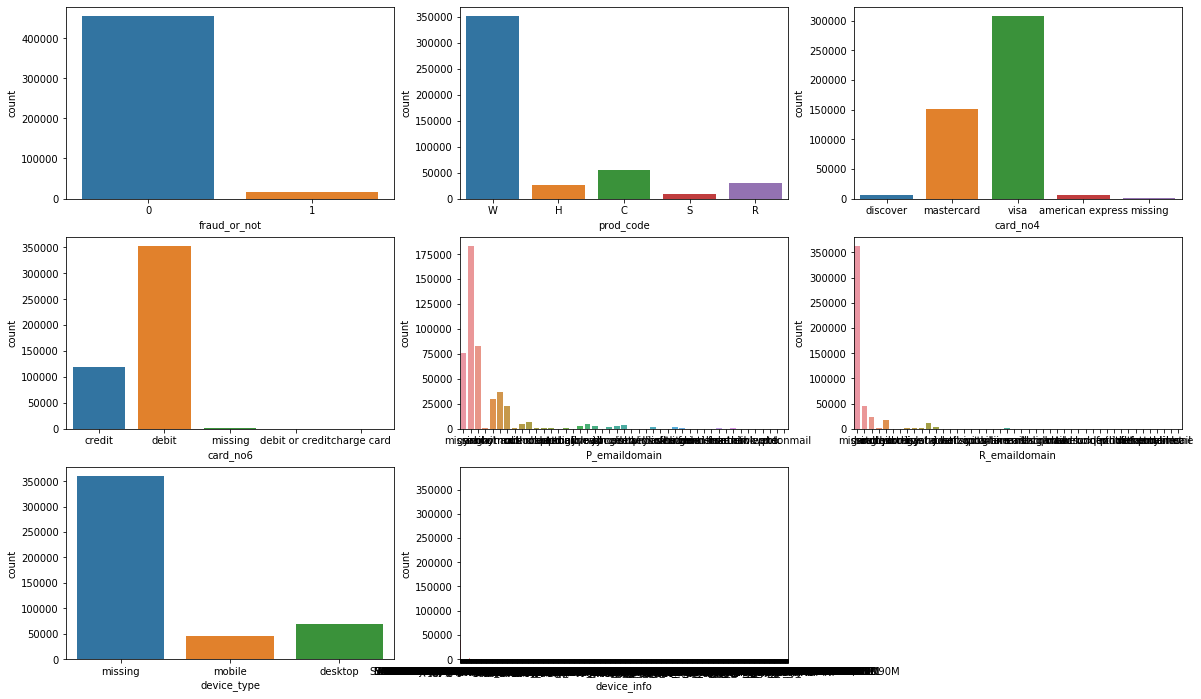

In [12]:
# count plot of several categorical values shows us that lots of small data is captured which will hamper us in one hot encoding.
fig = plt.figure(figsize = (20, 12)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

sns.countplot(data=train_df, x="fraud_or_not", ax=ax1)
sns.countplot(data=train_df, x="prod_code", ax=ax2)
sns.countplot(data=train_df, x="card_no4", ax=ax3)
sns.countplot(data=train_df, x="card_no6", ax=ax4)
sns.countplot(data=train_df, x="P_emaildomain", ax=ax5)
sns.countplot(data=train_df, x="R_emaildomain", ax=ax6)
sns.countplot(data=train_df, x="device_type", ax=ax7)
sns.countplot(data=train_df, x="device_info", ax=ax8)



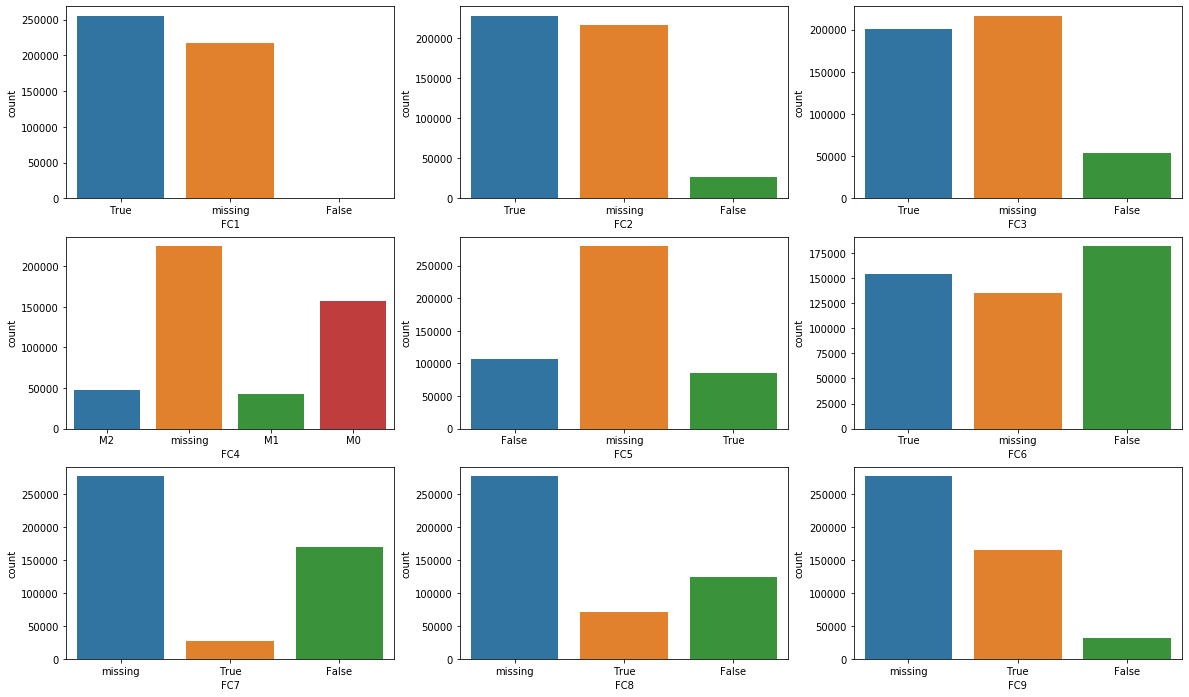

In [13]:
# FC1	FC2	FC3	FC4	FC5	FC6	FC7	FC8	FC9
fig1 = plt.figure(figsize = (20, 12))
ax11 = fig1.add_subplot(3, 3, 1) # row, column, position
ax12 = fig1.add_subplot(3, 3, 2)
ax13 = fig1.add_subplot(3, 3, 3)
ax14 = fig1.add_subplot(3, 3, 4)
ax15 = fig1.add_subplot(3, 3, 5)
ax16 = fig1.add_subplot(3, 3, 6)
ax17 = fig1.add_subplot(3, 3, 7)
ax18 = fig1.add_subplot(3, 3, 8)
ax19 = fig1.add_subplot(3, 3, 9)

sns.countplot(data=train_df, x="FC1", ax=ax11)
sns.countplot(data=train_df, x="FC2", ax=ax12)
sns.countplot(data=train_df, x="FC3", ax=ax13)
sns.countplot(data=train_df, x="FC4", ax=ax14)
sns.countplot(data=train_df, x="FC5", ax=ax15)
sns.countplot(data=train_df, x="FC6", ax=ax16)
sns.countplot(data=train_df, x="FC7", ax=ax17)
sns.countplot(data=train_df, x="FC8", ax=ax18)
sns.countplot(data=train_df, x="FC9", ax=ax19)

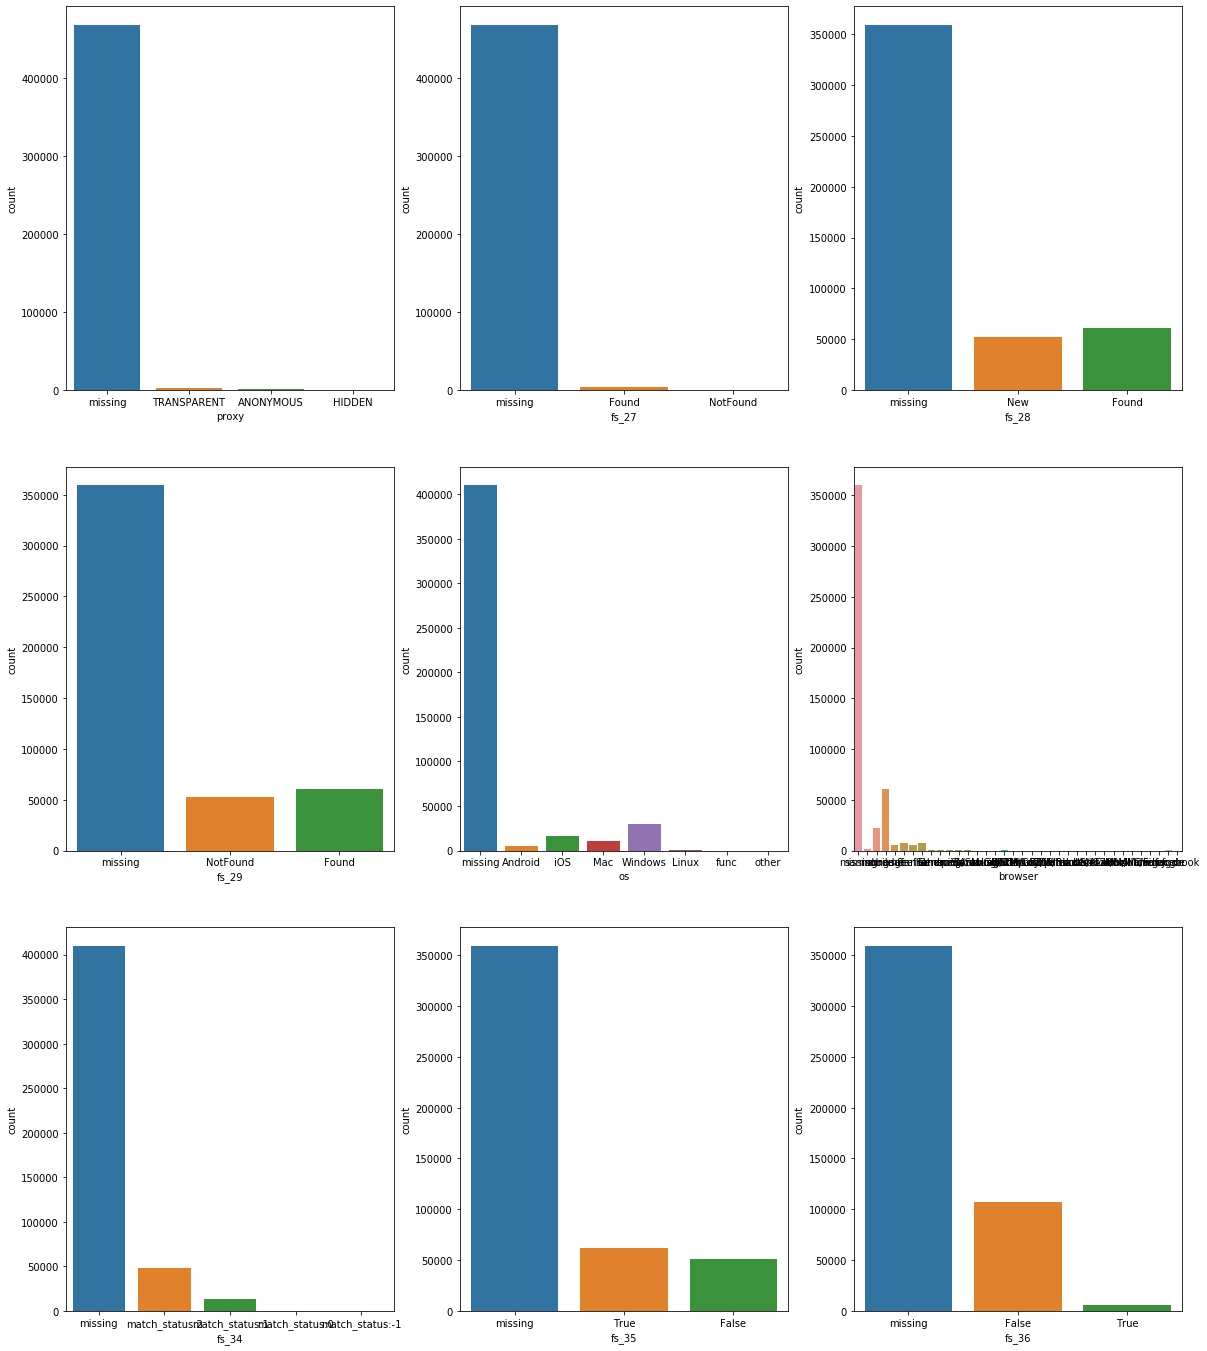

In [14]:
# fs_27	fs_28	fs_29	fs_30	fs_31	fs_34	fs_35	fs_36	fs_37	fs_38
fig2 = plt.figure(figsize = (20, 24))
ax20 = fig2.add_subplot(3, 3, 1)
ax21 = fig2.add_subplot(3, 3, 2) # row, column, position
ax22 = fig2.add_subplot(3, 3, 3)
ax23 = fig2.add_subplot(3, 3, 4)
ax24 = fig2.add_subplot(3, 3, 5)
ax25 = fig2.add_subplot(3, 3, 6)
ax26 = fig2.add_subplot(3, 3, 7)
ax27 = fig2.add_subplot(3, 3, 8)
ax28 = fig2.add_subplot(3, 3, 9)
# ax29 = fig2.add_subplot(3, 3, 10)
# ax30 = fig2.add_subplot(3, 3, 11)

sns.countplot(data=train_df, x="proxy", ax=ax20)
sns.countplot(data=train_df, x="fs_27", ax=ax21)
sns.countplot(data=train_df, x="fs_28", ax=ax22)
sns.countplot(data=train_df, x="fs_29", ax=ax23)
sns.countplot(data=train_df, x="os", ax=ax24)
sns.countplot(data=train_df, x="browser", ax=ax25)
sns.countplot(data=train_df, x="fs_34", ax=ax26)
sns.countplot(data=train_df, x="fs_35", ax=ax27)
sns.countplot(data=train_df, x="fs_36", ax=ax28)
# sns.countplot(data=train_df, x="fs_37", ax=ax29)
# sns.countplot(data=train_df, x="fs_38", ax=ax30)
# fs_33':'resolution','fs_31':'browser','fs_30':'os','fs_23':'proxy'

In [15]:
# train_df.to_csv('tesing.csv',sep=',',index=False)

In [16]:
# in this function we are going to convert several small classes in categorical dataset to 'others' class.

def trim_categorical(df):
    del df['device_info']
    cat_columns.remove('device_info')
    
    df.loc[~df['P_emaildomain'].isin(['missing']),'P_emaildomain'] = 'others'
    df.loc[~df['R_emaildomain'].isin(['missing']),'R_emaildomain'] = 'others'
    df.loc[~df['browser'].isin(['missing']),'browser'] = 'others'

    return df

train_df = trim_categorical(train_df)
train_df[['browser','P_emaildomain','R_emaildomain']].head(10)

,browser,P_emaildomain,R_emaildomain
0,missing,missing,missing
1,others,others,missing
2,missing,others,missing
3,missing,others,missing
4,missing,others,missing
5,others,others,missing
6,missing,others,missing
7,others,others,others
8,others,others,others
9,missing,others,missing


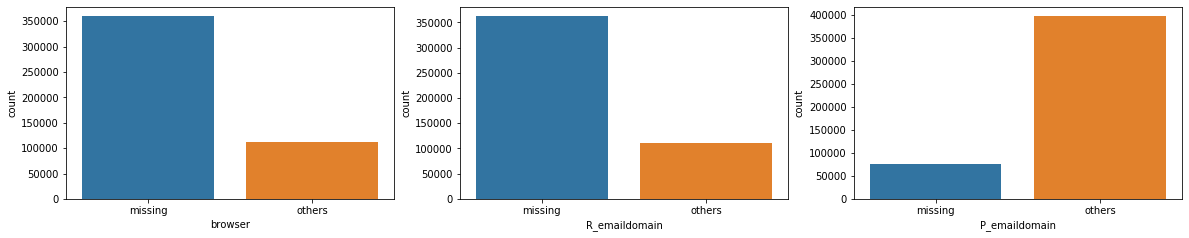

In [17]:
fig3 = plt.figure(figsize = (20, 12))
ax01 = fig3.add_subplot(3, 3, 1)
ax02 = fig3.add_subplot(3, 3, 2)
ax03 = fig3.add_subplot(3, 3, 3)

sns.countplot(data=train_df, x="browser", ax=ax01)
sns.countplot(data=train_df, x="R_emaildomain", ax=ax02)
sns.countplot(data=train_df, x="P_emaildomain", ax=ax03)

In [18]:
# one hot encoding 
train_df = pd.get_dummies(train_df)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472432 entries, 0 to 472431
Columns: 186 entries, fraud_or_not to device_type_mobile
dtypes: float32(79), float64(1), int16(5), int32(1), uint8(100)
memory usage: 197.3 MB


In [20]:
train_df.describe()

,fraud_or_not,trans_dt,trans_amt,card_no1,card_no2,card_no3,card_no5,address1,address2,district1,district2,FA3,FA5,FA13,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FD91,FD98,FD107,FD108,FD109,FD112,FD115,FD116,FD121,FD122,FD123,FD124,FD130,FD131,FD135,FD136,FD161,FD166,FD169,FD205,FD207,FD208,FD209,FD210,FD215,FD226,FD227,FD234,FD267,FD270,FD281,FD282,FD283,FD284,FD285,FD286,FD288,FD290,FD291,FD300,FD305,FD309,FD313,FD314,FD335,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_18,resolution,prod_code_C,prod_code_H,prod_code_R,prod_code_S,prod_code_W,card_no4_american express,card_no4_discover,card_no4_mastercard,card_no4_missing,card_no4_visa,card_no6_charge card,card_no6_credit,card_no6_debit,card_no6_debit or credit,card_no6_missing,P_emaildomain_missing,P_emaildomain_others,R_emaildomain_missing,R_emaildomain_others,FC1_False,FC1_True,FC1_missing,FC2_False,FC2_True,FC2_missing,FC3_False,FC3_True,FC3_missing,FC4_M0,FC4_M1,FC4_M2,FC4_missing,FC5_False,FC5_True,FC5_missing,FC6_False,FC6_True,FC6_missing,FC7_False,FC7_True,FC7_missing,FC8_False,FC8_True,FC8_missing,FC9_False,FC9_True,FC9_missing,fs_12_Found,fs_12_NotFound,fs_12_missing,fs_15_Found,fs_15_New,fs_15_Unknown,fs_15_missing,fs_16_Found,fs_16_NotFound,fs_16_missing,proxy_ANONYMOUS,proxy_HIDDEN,proxy_TRANSPARENT,proxy_missing,fs_27_Found,fs_27_NotFound,fs_27_missing,fs_28_Found,fs_28_New,fs_28_missing,fs_29_Found,fs_29_NotFound,fs_29_missing,os_Android,os_Linux,os_Mac,os_Windows,os_func,os_iOS,os_missing,os_other,browser_missing,browser_others,fs_34_match_status:-1,fs_34_match_status:0,fs_34_match_status:1,fs_34_match_status:2,fs_34_missing,fs_35_False,fs_35_True,fs_35_missing,fs_36_False,fs_36_True,fs_36_missing,fs_37_False,fs_37_True,fs_37_missing,fs_38_False,fs_38_True,fs_38_missing,device_type_desktop,device_type_missing,device_type_mobile
count,472432.000000,4.724320e+05,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,4.724320e+05,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.00000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000,472432.000000

In [21]:
correct_count=train_df['fraud_or_not'][train_df['fraud_or_not'] == 0].count()
fraud_count=train_df['fraud_or_not'][train_df['fraud_or_not'] == 1].count()
total_count=train_df['fraud_or_not'].count()
total_count,correct_count,fraud_count

(472432, 455881, 16551)

In [22]:
# it can be seen here that this is an unbalanced data set
# we have just 4% of total data with fraud as output.

print(f'Fraud data accounts for {math.ceil(fraud_count/total_count*100)}% of the training dataset')

Fraud data accounts for 4% of the training dataset


In [23]:
df_fraud = train_df[train_df['fraud_or_not']==1]
df_fraud.describe()

,fraud_or_not,trans_dt,trans_amt,card_no1,card_no2,card_no3,card_no5,address1,address2,district1,district2,FA3,FA5,FA13,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FD91,FD98,FD107,FD108,FD109,FD112,FD115,FD116,FD121,FD122,FD123,FD124,FD130,FD131,FD135,FD136,FD161,FD166,FD169,FD205,FD207,FD208,FD209,FD210,FD215,FD226,FD227,FD234,FD267,FD270,FD281,FD282,FD283,FD284,FD285,FD286,FD288,FD290,FD291,FD300,FD305,FD309,FD313,FD314,FD335,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_18,resolution,prod_code_C,prod_code_H,prod_code_R,prod_code_S,prod_code_W,card_no4_american express,card_no4_discover,card_no4_mastercard,card_no4_missing,card_no4_visa,card_no6_charge card,card_no6_credit,card_no6_debit,card_no6_debit or credit,card_no6_missing,P_emaildomain_missing,P_emaildomain_others,R_emaildomain_missing,R_emaildomain_others,FC1_False,FC1_True,FC1_missing,FC2_False,FC2_True,FC2_missing,FC3_False,FC3_True,FC3_missing,FC4_M0,FC4_M1,FC4_M2,FC4_missing,FC5_False,FC5_True,FC5_missing,FC6_False,FC6_True,FC6_missing,FC7_False,FC7_True,FC7_missing,FC8_False,FC8_True,FC8_missing,FC9_False,FC9_True,FC9_missing,fs_12_Found,fs_12_NotFound,fs_12_missing,fs_15_Found,fs_15_New,fs_15_Unknown,fs_15_missing,fs_16_Found,fs_16_NotFound,fs_16_missing,proxy_ANONYMOUS,proxy_HIDDEN,proxy_TRANSPARENT,proxy_missing,fs_27_Found,fs_27_NotFound,fs_27_missing,fs_28_Found,fs_28_New,fs_28_missing,fs_29_Found,fs_29_NotFound,fs_29_missing,os_Android,os_Linux,os_Mac,os_Windows,os_func,os_iOS,os_missing,os_other,browser_missing,browser_others,fs_34_match_status:-1,fs_34_match_status:0,fs_34_match_status:1,fs_34_match_status:2,fs_34_missing,fs_35_False,fs_35_True,fs_35_missing,fs_36_False,fs_36_True,fs_36_missing,fs_37_False,fs_37_True,fs_37_missing,fs_38_False,fs_38_True,fs_38_missing,device_type_desktop,device_type_missing,device_type_mobile
count,16551.0,1.655100e+04,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,1.655100e+04,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.0,16551.000000,16551.000000,16551.0,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.0,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.00000,16551.000000,16551.000000,16551.00000,16551.000000,16551.000000,16551.00000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.0,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000,16551.0,16551.000000,16551.000000,16551.000000,16551.000000,16551.000000

In [24]:
df_correct = train_df[train_df['fraud_or_not']==0]
df_correct.describe()

,fraud_or_not,trans_dt,trans_amt,card_no1,card_no2,card_no3,card_no5,address1,address2,district1,district2,FA3,FA5,FA13,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FD91,FD98,FD107,FD108,FD109,FD112,FD115,FD116,FD121,FD122,FD123,FD124,FD130,FD131,FD135,FD136,FD161,FD166,FD169,FD205,FD207,FD208,FD209,FD210,FD215,FD226,FD227,FD234,FD267,FD270,FD281,FD282,FD283,FD284,FD285,FD286,FD288,FD290,FD291,FD300,FD305,FD309,FD313,FD314,FD335,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_18,resolution,prod_code_C,prod_code_H,prod_code_R,prod_code_S,prod_code_W,card_no4_american express,card_no4_discover,card_no4_mastercard,card_no4_missing,card_no4_visa,card_no6_charge card,card_no6_credit,card_no6_debit,card_no6_debit or credit,card_no6_missing,P_emaildomain_missing,P_emaildomain_others,R_emaildomain_missing,R_emaildomain_others,FC1_False,FC1_True,FC1_missing,FC2_False,FC2_True,FC2_missing,FC3_False,FC3_True,FC3_missing,FC4_M0,FC4_M1,FC4_M2,FC4_missing,FC5_False,FC5_True,FC5_missing,FC6_False,FC6_True,FC6_missing,FC7_False,FC7_True,FC7_missing,FC8_False,FC8_True,FC8_missing,FC9_False,FC9_True,FC9_missing,fs_12_Found,fs_12_NotFound,fs_12_missing,fs_15_Found,fs_15_New,fs_15_Unknown,fs_15_missing,fs_16_Found,fs_16_NotFound,fs_16_missing,proxy_ANONYMOUS,proxy_HIDDEN,proxy_TRANSPARENT,proxy_missing,fs_27_Found,fs_27_NotFound,fs_27_missing,fs_28_Found,fs_28_New,fs_28_missing,fs_29_Found,fs_29_NotFound,fs_29_missing,os_Android,os_Linux,os_Mac,os_Windows,os_func,os_iOS,os_missing,os_other,browser_missing,browser_others,fs_34_match_status:-1,fs_34_match_status:0,fs_34_match_status:1,fs_34_match_status:2,fs_34_missing,fs_35_False,fs_35_True,fs_35_missing,fs_36_False,fs_36_True,fs_36_missing,fs_37_False,fs_37_True,fs_37_missing,fs_38_False,fs_38_True,fs_38_missing,device_type_desktop,device_type_missing,device_type_mobile
count,455881.0,4.558810e+05,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.00000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.00000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,4.558810e+05,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,455881.000000,45588

In [25]:
# here we are doing undersampling by taking approx 16k data of fraud and correct .
# we are also creating a test data set which is unbalanced(1000-> 40 fraud (4%))

df_fraud_test = df_fraud.sample(n=40, random_state=1)
df_fraud_gold = pd.concat([df_fraud, df_fraud_test])
df_fraud_gold.drop_duplicates(keep=False, inplace = True)

In [26]:
df_correct_test = df_correct.sample(n=960, random_state=1)
df_correct_gold = df_correct.sample(n=len(df_fraud_gold), random_state=1)
df_correct_gold = pd.concat([df_correct_gold, df_correct_test])
df_correct_gold.drop_duplicates(keep=False, inplace = True)

In [27]:
print(len(df_correct_gold),len(df_correct_test),len(df_fraud_gold),len(df_fraud_test))

15547 960 16507 40


In [28]:
# gold dataset is the training data set and test is the testing dataset
df_gold = pd.concat([df_correct_gold, df_fraud_gold])
df_test = pd.concat([df_correct_test, df_fraud_test])

In [29]:
df_gold.head()

,fraud_or_not,trans_dt,trans_amt,card_no1,card_no2,card_no3,card_no5,address1,address2,district1,district2,FA3,FA5,FA13,FB2,FB3,FB4,FB5,FB6,FB7,FB8,FB9,FB10,FB11,FB12,FB13,FB14,FB15,FD91,FD98,FD107,FD108,FD109,FD112,FD115,FD116,FD121,FD122,FD123,FD124,FD130,FD131,FD135,FD136,FD161,FD166,FD169,FD205,FD207,FD208,FD209,FD210,FD215,FD226,FD227,FD234,FD267,FD270,FD281,FD282,FD283,FD284,FD285,FD286,FD288,FD290,FD291,FD300,FD305,FD309,FD313,FD314,FD335,FD339,fs_01,fs_02,fs_03,fs_04,fs_05,fs_06,fs_07,fs_08,fs_09,fs_10,fs_18,resolution,prod_code_C,prod_code_H,prod_code_R,prod_code_S,prod_code_W,card_no4_american express,card_no4_discover,card_no4_mastercard,card_no4_missing,card_no4_visa,card_no6_charge card,card_no6_credit,card_no6_debit,card_no6_debit or credit,card_no6_missing,P_emaildomain_missing,P_emaildomain_others,R_emaildomain_missing,R_emaildomain_others,FC1_False,FC1_True,FC1_missing,FC2_False,FC2_True,FC2_missing,FC3_False,FC3_True,FC3_missing,FC4_M0,FC4_M1,FC4_M2,FC4_missing,FC5_False,FC5_True,FC5_missing,FC6_False,FC6_True,FC6_missing,FC7_False,FC7_True,FC7_missing,FC8_False,FC8_True,FC8_missing,FC9_False,FC9_True,FC9_missing,fs_12_Found,fs_12_NotFound,fs_12_missing,fs_15_Found,fs_15_New,fs_15_Unknown,fs_15_missing,fs_16_Found,fs_16_NotFound,fs_16_missing,proxy_ANONYMOUS,proxy_HIDDEN,proxy_TRANSPARENT,proxy_missing,fs_27_Found,fs_27_NotFound,fs_27_missing,fs_28_Found,fs_28_New,fs_28_missing,fs_29_Found,fs_29_NotFound,fs_29_missing,os_Android,os_Linux,os_Mac,os_Windows,os_func,os_iOS,os_missing,os_other,browser_missing,browser_others,fs_34_match_status:-1,fs_34_match_status:0,fs_34_match_status:1,fs_34_match_status:2,fs_34_missing,fs_35_False,fs_35_True,fs_35_missing,fs_36_False,fs_36_True,fs_36_missing,fs_37_False,fs_37_True,fs_37_missing,fs_38_False,fs_38_True,fs_38_missing,device_type_desktop,device_type_missing,device_type_mobile
22416,0,698069,117.000000,8320,476.0,150.0,166.0,226.0,87.0,9.0,-1.0,0,0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,128.0,-1.0,-1.0,-1.0,128.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0000,0.0000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
156437,0,4402733,49.950001,1444,490.0,150.0,166.0,204.0,87.0,14.0,-1.0,0,3,9,60.0,28.0,28.0,28.0,-1.0,-1.0,-1.0,-1.0,60.0,263.0,-1.0,-1.0,-1.0,263.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,49.950001,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0000,0.0000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
239873,0,7418586,405.000000,18370,547.0,150.0,226.0,191.0,87.0,-1.0,-1.0,0,0,12,84.0,3.0,169.0,3.0,-1.0,-1.0,-1.0,-1.0,84.0,-1.0,-1.0,-1.0,-1.0,77.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97.000000,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0000,0.0000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
251088,0,7836616,44.000000,4663,-1.0,-1.0,-1.0,264.0,87.0,-1.0,-1.0,0,0,44,-1.0,-1.0,303.0,303.0,-1.0,-1.0,-1.0,-1.0,447.0,366.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1

In [30]:
# checking if there is any nan values
df_gold.isnull().sum()

fraud_or_not                 0
trans_dt                     0
trans_amt                    0
card_no1                     0
card_no2                     0
card_no3                     0
card_no5                     0
address1                     0
address2                     0
district1                    0
district2                    0
FA3                          0
FA5                          0
FA13                         0
FB2                          0
FB3                          0
FB4                          0
FB5                          0
FB6                          0
FB7                          0
FB8                          0
FB9                          0
FB10                         0
FB11                         0
FB12                         0
FB13                         0
FB14                         0
FB15                         0
FD91                         0
FD98                         0
FD107                        0
FD108                        0
FD109   

In [31]:
# splitting the data into X and Y train test.
X_train_gold = df_gold.iloc[:,1:].values
y_train_gold = df_gold.iloc[:,0].values

X_test= df_test.iloc[:,1:].values
y_test= df_test.iloc[:,0].values

In [32]:
# performing standardscalar and saving the its pickle so that it can be used for output scaling in another test.ipnyb file
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_gold = sc.fit_transform(X_train_gold)
pickle.dump(sc,open('../model/standardscaler.sav','wb'))
X_test = sc.transform(X_test)

In [33]:
bc = (X_test.shape)
bc

(1000, 185)

In [34]:
# applying principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_gold = pca.fit_transform(X_train_gold)
pickle.dump(pca,open('../model/pca.sav','wb'))
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

185

In [35]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
classifier_logit = LogisticRegression(random_state =0)
classifier_logit.fit(X_train_gold,y_train_gold)
pickle.dump(classifier_logit,open('../model/classifier_logit.sav','wb'))
y_pred =classifier_logit.predict(X_test)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

     Correct       0.99      0.77      0.86       960
       Fraud       0.13      0.80      0.22        40

    accuracy                           0.77      1000
   macro avg       0.56      0.78      0.54      1000
weighted avg       0.95      0.77      0.84      1000

roc score for logistic regression classifier is 0.7838541666666666


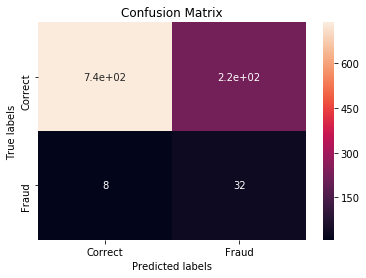

In [36]:
# finding the classification_report, confusion_matrix and roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
target_names = ['Correct', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'roc score for logistic regression classifier is {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Correct', 'Fraud']); ax.yaxis.set_ticklabels(['Correct', 'Fraud']);


In [37]:
# using xgboost classifier
from xgboost import XGBClassifier
# classifier_xg = XGBClassifier()
# classifier_xg.fit(X_train_gold,y_train_gold)
# y_pred =classifier_xg.predict(X_test)

classifier_xg = XGBClassifier(max_depth=7,min_child_weight=1,learning_rate=0.1,
                                  n_estimators=100,silent=True,objective='binary:logistic',
                                  gamma=0,max_delta_step=0,subsample=1,colsample_bytree=1,
                                  colsample_bylevel=1,reg_alpha=0,reg_lambda=0,
                                  scale_pos_weight=1,seed=1, missing=None)

classifier_xg.fit(X_train_gold, y_train_gold, eval_metric='auc', verbose=True,
                  eval_set=[(X_test, y_test)], early_stopping_rounds=100)

pickle.dump(classifier_xg,open('../model/classifier_xg.sav','wb'))

y_pred = classifier_xg.predict(X_test)

[0]	validation_0-auc:0.813177
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.839935
[2]	validation_0-auc:0.847266
[3]	validation_0-auc:0.856432
[4]	validation_0-auc:0.861172
[5]	validation_0-auc:0.863685
[6]	validation_0-auc:0.870143
[7]	validation_0-auc:0.872565
[8]	validation_0-auc:0.875052
[9]	validation_0-auc:0.876354
[10]	validation_0-auc:0.875781
[11]	validation_0-auc:0.87724
[12]	validation_0-auc:0.875104
[13]	validation_0-auc:0.877839
[14]	validation_0-auc:0.878932
[15]	validation_0-auc:0.879661
[16]	validation_0-auc:0.878802
[17]	validation_0-auc:0.88125
[18]	validation_0-auc:0.882891
[19]	validation_0-auc:0.883542
[20]	validation_0-auc:0.883932
[21]	validation_0-auc:0.884323
[22]	validation_0-auc:0.884635
[23]	validation_0-auc:0.886068
[24]	validation_0-auc:0.886745
[25]	validation_0-auc:0.887917
[26]	validation_0-auc:0.888568
[27]	validation_0-auc:0.890755
[28]	validation_0-auc:0.89125
[29]	validation_0-auc:0.894219
[30]	validation_0-

              precision    recall  f1-score   support

     Correct       0.99      0.79      0.88       960
       Fraud       0.14      0.80      0.23        40

    accuracy                           0.79      1000
   macro avg       0.56      0.79      0.55      1000
weighted avg       0.96      0.79      0.85      1000

roc score for xgboost classifier is 0.7932291666666668


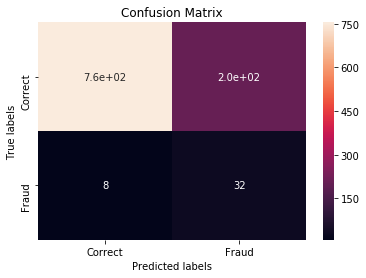

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
target_names = ['Correct', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'roc score for xgboost classifier is {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Correct', 'Fraud']); ax.yaxis.set_ticklabels(['Correct', 'Fraud']);


In [39]:
# applying randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier(n_jobs=3, n_estimators=1000,random_state=0)
classifier_rfc.fit(X_train_gold,y_train_gold)
pickle.dump(classifier_rfc,open('../model/classifier_rfc.sav','wb'))
y_pred =classifier_rfc.predict(X_test)

              precision    recall  f1-score   support

     Correct       0.99      0.79      0.88       960
       Fraud       0.15      0.88      0.25        40

    accuracy                           0.79      1000
   macro avg       0.57      0.83      0.56      1000
weighted avg       0.96      0.79      0.85      1000

roc score for random forest classifier is 0.8302083333333333


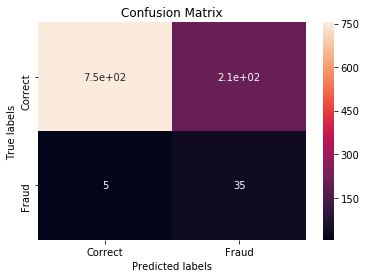

In [40]:
# finding the classification_report, confusion_matrix and roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
target_names = ['Correct', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'roc score for random forest classifier is {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Correct', 'Fraud']); ax.yaxis.set_ticklabels(['Correct', 'Fraud']);

## seeing all the classifier output - our main concern should be correct values classifying as fraud as this will result in losing out client base. 

## Hence we are going to select - xgboost classifier because it is giving less false positives among the above mentioned classifiers and has the good auc-roc score.

In [41]:
# this code will add a corrmat and explained varaince value in a csv in json format which 
# will be used in test script
import json
test_config = {}
test_config['corrmat'] = corrmat
test_config['vector_length'] = len(explained_variance)
with open('../model/config.csv','w') as f:
    json.dump(test_config,f)